In [1]:
# load dependencies'
import concurrent.futures
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import osmnx as ox
import networkx as nx
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from urllib.parse import urljoin
from shapely.geometry import Point, LineString, Polygon
import pyproj 
import mm_utils
from function_util import *
from SMP2 import SMP2
from FIS3 import FIS3
from datetime import datetime

In [2]:
gdf_utm = pd.read_pickle('gdf_utm.pkl')
edges_utm = pd.read_pickle('edges_utm.pkl')
nodes_utm = pd.read_pickle('nodes_utm.pkl')
curr_edge = pd.read_pickle('current_edge.pkl')

C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3505: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


correct dimension
correct dimension
correct dimension
correct dimension
correct dimension


C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\skfuzzy\membership\generatemf.py:340: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(- c * (x - b)))
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\skfuzzy\membership\generatemf.py:340: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(- c * (x - b)))
C:\Users\j_3r3\.conda\envs\ox\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could n

,,,osmid,oneway,lanes,name,highway,maxspeed,reversed,length,ref,geometry,...,access,lon_lat,str_id,prev_end_node,perp_dist,connectivity,d_n,lon_lat_pair,edge_heading,heading_error
u,v,key,,,,,,,,,,,,,,,,,,,,,
9262374226,128830413,0,74034334,False,2,Gänsheidestraße,tertiary,50,True,76.304,NaN,"LINESTRING (514388.705 5401910.990, 514385.060...",...,NaN,"LINESTRING (9.19582 48.77004, 9.19577 48.77017...",74034334,5156897997,2.909127,0,55.502941,"[(9.1958216, 48.7700379), (9.1957725, 48.77016...",344.486654,0.78387


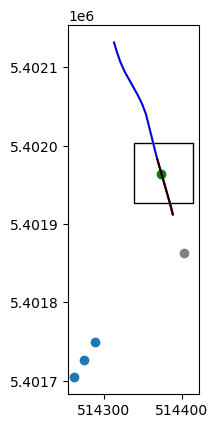

In [4]:
point_index = 39
prev_loc = gdf_utm.iloc[[point_index - 1]]
curr_loc = gdf_utm.iloc[[point_index]]
last_matched = point_matching(prev_loc, curr_edge.iloc[0])
err_size = 38
SMP2(curr_loc, curr_edge, prev_loc, last_matched, err_size, nodes_utm, edges_utm, gdf_utm, plot = True)